In [2]:
!wget --no-check-certificate https://khazana.gatech.edu/download/2016_SD_Huan/PLMDB_03102016.zip

--2023-06-15 13:58:45--  https://khazana.gatech.edu/download/2016_SD_Huan/PLMDB_03102016.zip
Resolving khazana.gatech.edu (khazana.gatech.edu)... 143.215.76.174
Connecting to khazana.gatech.edu (khazana.gatech.edu)|143.215.76.174|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2091709 (2.0M) [application/zip]
Saving to: ‘PLMDB_03102016.zip’

PLMDB_03102016.zip  100%[===================>]   1.99M  5.62MB/s    in 0.4s    

2023-06-15 13:58:46 (5.62 MB/s) - ‘PLMDB_03102016.zip’ saved [2091709/2091709]



In [3]:
!unzip /content/PLMDB_03102016.zip -d /content/Polymers


Archive:  /content/PLMDB_03102016.zip
   creating: /content/Polymers/polymer_scientific_data_confirmed/
  inflating: /content/Polymers/polymer_scientific_data_confirmed/.DS_Store  
   creating: /content/Polymers/__MACOSX/
   creating: /content/Polymers/__MACOSX/polymer_scientific_data_confirmed/
  inflating: /content/Polymers/__MACOSX/polymer_scientific_data_confirmed/._.DS_Store  
  inflating: /content/Polymers/polymer_scientific_data_confirmed/0001.cif  
  inflating: /content/Polymers/__MACOSX/polymer_scientific_data_confirmed/._0001.cif  
  inflating: /content/Polymers/polymer_scientific_data_confirmed/0002.cif  
  inflating: /content/Polymers/__MACOSX/polymer_scientific_data_confirmed/._0002.cif  
  inflating: /content/Polymers/polymer_scientific_data_confirmed/0003.cif  
  inflating: /content/Polymers/__MACOSX/polymer_scientific_data_confirmed/._0003.cif  
  inflating: /content/Polymers/polymer_scientific_data_confirmed/0004.cif  
  inflating: /content/Polymers/__MACOSX/polymer_sc

In [4]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 50.3 MB/s eta 0:00:00


In [26]:
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from pymatgen.io.cif import CifParser
from pymatgen.core.composition import Composition

<ipython-input-23-5bab48be55a4>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_elements))
<ipython-input-23-5bab48be55a4>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(coords[0], coords[1], coords[2], c=color, s=100)


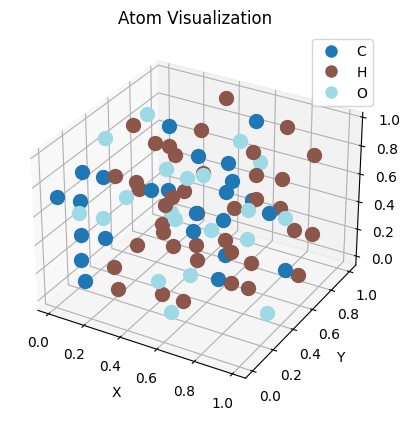

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pymatgen.io.cif import CifParser
from pymatgen.core import Element
from matplotlib.lines import Line2D

# Specify the path to your CIF file
cif_file = "/content/Polymers/polymer_scientific_data_confirmed/0001.cif"

# Read the CIF file using CifParser
parser = CifParser(cif_file)
structure = parser.get_structures(primitive=False)[0]  # Assuming only one structure in the CIF file

# Extract atomic coordinates and elements
atom_coords = structure.frac_coords
atom_elements = [site.specie.symbol for site in structure.sites]


# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign unique colors to each element
unique_elements = list(set(atom_elements))
color_map = plt.cm.get_cmap('tab20', len(unique_elements))
element_colors = {element: color_map(i) for i, element in enumerate(unique_elements)}

# Plot the atoms with different colors based on their elements
for coords, element in zip(atom_coords, atom_elements):
    color = element_colors[element]
    ax.scatter(coords[0], coords[1], coords[2], c=color, s=100)

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=element, markerfacecolor=color, markersize=10)
                   for element, color in element_colors.items()]

# Add legend
ax.legend(handles=legend_elements)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Atom Visualization')

# Show the plot
plt.show()



In [24]:
from rdkit import Chem
from rdkit.Geometry import Point3D

def coords_to_smiles(atom_coords, atom_elements):
    # Create an RDKit molecule object
    mol = Chem.RWMol()

    # Add atoms to the molecule with their coordinates
    for coords, element in zip(atom_coords, atom_elements):
        atom = Chem.Atom(element)
        atom.SetAtomMapNum(len(mol.GetAtoms()) + 1)  # Set atom map number
        atom.SetProp("_Name", element)  # Set atom name
        atom.SetDoubleProp('x', coords[0])
        atom.SetDoubleProp('y', coords[1])
        atom.SetDoubleProp('z', coords[2])
        mol.AddAtom(atom)

    # Add explicit hydrogens to the molecule
    mol.UpdatePropertyCache(strict=False)
    Chem.SanitizeMol(mol)
    mol = Chem.AddHs(mol)

    # Generate the SMILES string
    smiles = Chem.MolToSmiles(mol)

    return smiles


smiles_string = coords_to_smiles(atom_coords, atom_elements)
print(smiles_string)




[H][C:41]([H])([H])[H].[H][C:42]([H])([H])[H].[H][C:43]([H])([H])[H].[H][C:44]([H])([H])[H].[H][C:45]([H])([H])[H].[H][C:46]([H])([H])[H].[H][C:47]([H])([H])[H].[H][C:48]([H])([H])[H].[H][C:49]([H])([H])[H].[H][C:50]([H])([H])[H].[H][C:51]([H])([H])[H].[H][C:52]([H])([H])[H].[H][C:53]([H])([H])[H].[H][C:54]([H])([H])[H].[H][C:55]([H])([H])[H].[H][C:56]([H])([H])[H].[H][C:57]([H])([H])[H].[H][C:58]([H])([H])[H].[H][C:59]([H])([H])[H].[H][C:60]([H])([H])[H].[H][C:61]([H])([H])[H].[H][C:62]([H])([H])[H].[H][C:63]([H])([H])[H].[H][C:64]([H])([H])[H].[H][H:10].[H][H:11].[H][H:12].[H][H:13].[H][H:14].[H][H:15].[H][H:16].[H][H:17].[H][H:18].[H][H:19].[H][H:1].[H][H:20].[H][H:21].[H][H:22].[H][H:23].[H][H:24].[H][H:25].[H][H:26].[H][H:27].[H][H:28].[H][H:29].[H][H:2].[H][H:30].[H][H:31].[H][H:32].[H][H:33].[H][H:34].[H][H:35].[H][H:36].[H][H:37].[H][H:38].[H][H:39].[H][H:3].[H][H:40].[H][H:4].[H][H:5].[H][H:6].[H][H:7].[H][H:8].[H][H:9].[H][O:65][H].[H][O:66][H].[H][O:67][H].[H][O:68][H].[H][O

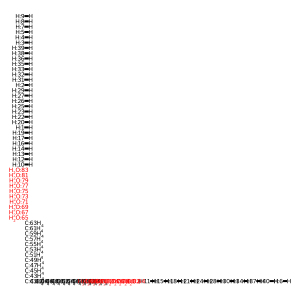

In [25]:
from rdkit import Chem
from rdkit.Chem import Draw

def draw_molecule(smiles):
    # Create an RDKit molecule object from the SMILES string
    mol = Chem.MolFromSmiles(smiles)

    # Generate an image of the molecule
    img = Draw.MolToImage(mol)

    # Show the image
    img.show()

draw_molecule(smiles_string)


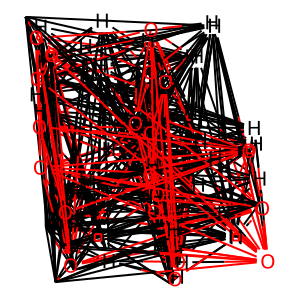

In [26]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw

# Specify the path to your CIF file
cif_file = "/content/Polymers/polymer_scientific_data_confirmed/0001.cif"

# Read the CIF file using CifParser
parser = CifParser(cif_file)
structure = parser.get_structures(primitive=False)[0]  # Assuming only one structure in the CIF file

# Extract atomic coordinates and elements
atom_coords = structure.cart_coords
atom_elements = [site.specie.symbol for site in structure.sites]

# Create an RDKit molecule
rdkit_mol = Chem.RWMol()

# Add atoms to the molecule with correct element types
for element in atom_elements:
    atom = Chem.Atom(element)
    rdkit_mol.AddAtom(atom)

# Add bonds between atoms based on connectivity information
added_bonds = set()  # Keep track of added bonds
for i, site in enumerate(structure.sites):
    atom_index = i
    neighbors = structure.get_neighbors(site, 3.0)  # Adjust the bond length threshold if needed
    for neighbor in neighbors:
        neighbor_index = int(neighbor.index)
        bond_indices = tuple(sorted([atom_index, neighbor_index]))
        if bond_indices not in added_bonds:
            rdkit_mol.AddBond(atom_index, neighbor_index, Chem.BondType.SINGLE)
            added_bonds.add(bond_indices)

# Generate the 3D depiction of the molecule
rdkit_mol = rdkit_mol.GetMol()
rdkit_mol.RemoveAllConformers()  # Remove any existing conformers
conformer = Chem.Conformer(len(atom_coords))  # Create a new conformer

# Set the atom positions in the conformer
for i, coords in enumerate(atom_coords):
    conformer.SetAtomPosition(i, coords)

# Add the conformer to the molecule
rdkit_mol.AddConformer(conformer)

# Generate the 3D depiction of the molecule
image = Draw.MolToImage(rdkit_mol, size=(300, 300), kekulize=False)

# Display the image
image.show()


In [27]:
import os
# from pymatgen import Structure
from rdkit import Chem

def generate_smiles_from_cif(cif_file):
    # Read the CIF file using pymatgen
    # Read the CIF file using CifParser
    parser = CifParser(cif_file)
    structure = parser.get_structures(primitive=False)[0]  # Assuming only one structure in the CIF file

    # Get the atom coordinates and elements
    atom_coords = structure.frac_coords
    atom_elements = [site.specie.symbol for site in structure.sites]

    # Generate the SMILES string
    smiles = coords_to_smiles(atom_coords, atom_elements)

    return smiles

# Provide the path to the folder containing CIF files
folder_path = '/content/Polymers/polymer_scientific_data_confirmed'

# Initialize the list to store SMILES strings
polymer_smiles = []

# Iterate through the CIF files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.cif'):
        cif_file = os.path.join(folder_path, filename)

        # Generate SMILES for each CIF file
        smiles = generate_smiles_from_cif(cif_file)

        # Append the SMILES string to the polymer_smiles list
        polymer_smiles.append(smiles)

# Print the list of SMILES strings for the polymer
print(len(polymer_smiles))


/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1134: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


1073


In [29]:
from pickle import FALSE
from rdkit import Chem

def is_valid_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        return True
    except:
        return False

valid = False
for smiles in polymer_smiles:
    if not is_valid_smiles(smiles):
        print(f"Invalid SMILES: {smiles}")
        valid = True
if(valid):
  print("Everything is valid")

In [33]:
!wget http://www.crystallography.net/cod/smi/allcod.smi

--2023-06-15 14:30:06--  http://www.crystallography.net/cod/smi/allcod.smi
Resolving www.crystallography.net (www.crystallography.net)... 158.129.170.82
Connecting to www.crystallography.net (www.crystallography.net)|158.129.170.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23068404 (22M) [application/smil+xml]
Saving to: ‘allcod.smi’

allcod.smi          100%[===================>]  22.00M  9.34MB/s    in 2.4s    

2023-06-15 14:30:09 (9.34 MB/s) - ‘allcod.smi’ saved [23068404/23068404]



In [4]:
!wget http://www.crystallography.net/cod/smi/allcod-alt.smi


--2023-06-15 14:43:11--  http://www.crystallography.net/cod/smi/allcod-alt.smi
Resolving www.crystallography.net (www.crystallography.net)... 158.129.170.82
Connecting to www.crystallography.net (www.crystallography.net)|158.129.170.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 728816 (712K) [application/smil+xml]
Saving to: ‘allcod-alt.smi’

allcod-alt.smi      100%[===================>] 711.73K   826KB/s    in 0.9s    

2023-06-15 14:43:13 (826 KB/s) - ‘allcod-alt.smi’ saved [728816/728816]



In [14]:
!wget http://www.crystallography.net/cod/smi/allcod-hal.smi

--2023-06-15 14:48:34--  http://www.crystallography.net/cod/smi/allcod-hal.smi
Resolving www.crystallography.net (www.crystallography.net)... 158.129.170.82
Connecting to www.crystallography.net (www.crystallography.net)|158.129.170.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 690900 (675K) [application/smil+xml]
Saving to: ‘allcod-hal.smi’

allcod-hal.smi      100%[===================>] 674.71K   811KB/s    in 0.8s    

2023-06-15 14:48:36 (811 KB/s) - ‘allcod-hal.smi’ saved [690900/690900]



In [18]:
inorganic_smiles = []

with open('/content/allcod-hal.smi', 'r') as file:
    for line in file:
        smiles = line.strip().split('\t')[0]
        inorganic_smiles.append(smiles)
inorganic_smiles.pop(0)
print(len(inorganic_smiles))
print(inorganic_smiles[0])



5613
[Sn](I)(I)(I)I


In [19]:
from rdkit import Chem

def is_valid_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        return True
    except:
        return False


invalid_smiles_found = False
counter=0
for smiles in inorganic_smiles:
    if not is_valid_smiles(smiles):
        counter+=1
        invalid_smiles_found = True


print(counter)
if not invalid_smiles_found:
    print("Everything is valid")


[14:49:23] Explicit valence for atom # 4 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 121 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 53 B, 4, is greater than permitted
[14:49:23] Explicit valence for atom # 6 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 59 C, 5, is greater than permitted
[14:49:23] Explicit valence for atom # 6 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 6 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 6 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 50 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 1 O, 3, is greater than permitted
[14:49:23] Explicit valence for atom # 45 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 30 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 82 F, 2, is greater than permitted
[14:49:23] Explicit valence for atom # 95 F

5405


[14:49:24] Explicit valence for atom # 44 O, 3, is greater than permitted
[14:49:24] Explicit valence for atom # 46 O, 3, is greater than permitted
[14:49:24] Explicit valence for atom # 44 O, 3, is greater than permitted
[14:49:24] Explicit valence for atom # 43 F, 2, is greater than permitted
[14:49:24] Explicit valence for atom # 0 B, 4, is greater than permitted
[14:49:24] Explicit valence for atom # 58 F, 2, is greater than permitted
[14:49:24] Explicit valence for atom # 34 N, 4, is greater than permitted
[14:49:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[14:49:24] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:49:24] Explicit valence for atom # 53 F, 2, is greater than permitted
[14:49:24] Explicit valence for atom # 33 F, 2, is greater than permitted
[14:49:24] Explicit valence for atom # 33 F, 2, is greater than permitted
[14:49:24] Explicit valence for atom # 6 Br, 2, is greater than permitted
[14:49:24] Explicit valence for atom # 10